In [1]:
import sys
sys.path.append("../../")

from transportnet import net
from transportnet import line
from transportnet import vehicle
from stochastic import stochastic

from genetics import ga
import tools

from matplotlib import pyplot as plt
from scipy import stats as ss
import numpy as np

In [2]:
n = net.Net()

n.load_nodes_from_file('verkhnodniprovsk_nodes.txt')
# define the network configuration
n.load_from_file('verkhnodniprovsk_edges.txt')

# define demand intensity
for nd in n.nodes:
    nd.s_interval = stochastic.Stochastic(law=2, scale=30)
central = n.get_node(code=1)
central.s_interval = stochastic.Stochastic(law=2, scale=5)

# define a set of public transport lines
line1 = line.Line(n, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                    13, 12, 11, 15, 16, 17, 18, 19, 1], 
                    [1, 14])
line1.same_back_direction = False
line1.color = 'red'
line1.add_vehicles([vehicle.Vehicle(18)])

line2 = line.Line(n, [1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 18, 31, 32, 16, 10, 1],
                    [1, 1])
line2.same_back_direction = False
line2.color = 'green'
line2.add_vehicles([vehicle.Vehicle(50)])
line3 = line.Line(n, [1, 20, 33, 34, 35, 36, 37, 38,
                    37, 39, 36, 35, 18, 19, 1],
                    [1, 38])
line3.same_back_direction = False
line3.color = 'brown'
line3.add_vehicles([vehicle.Vehicle(18)])
line4 = line.Line(n, [1, 3, 4, 40, 41, 42, 43, 44,
                    43, 42, 41, 40, 4, 3, 1],
                    [1, 44])
line4.same_back_direction = True
line4.color = 'blue'
line4.add_vehicles([vehicle.Vehicle(38)])
line5 = line.Line(n, [1, 3, 4, 40, 41, 42, 45, 46, 47,
                    46, 45, 42, 41, 40, 4, 3, 1],
                    [1, 47])
line5.same_back_direction = True
line5.color = 'grey'
line5.add_vehicles([vehicle.Vehicle(38)])

n.lines.extend([line1, line2, line3, line4, line5])

## Simulate net

In [3]:
sim_time = 2.0 * 60
n.duration = sim_time
model_runs = 300

def fitness_function(shifts):
    res = []
    for _ in range(model_runs):
        n.reset()
        for idx in range(len(n.lines)):
            n.lines[idx].schedule_shift = shifts[idx]
        n.gen_demand(duration=n.duration)
        x = n.simulate(sim_time)
        res.append(x)
    return np.array(res)

# res = fitness_function([75, 90, 30, 95, 0])
# res.mean()

## Run GA

In [ ]:
model_runs = 5

winners = []
for pc in range(1, 11):
    print(pc)
    g = ga.GA()
    g.chromosome_size = len(n.lines), 7
    g.population_size = 100
    g.generations = 10
    g.crossover_probability = 0.1 * pc
    g.mutation_probability = 0.2
    g.mutation_turns = 3
    g.fitness_function = lambda xs: fitness_function(xs).mean()
    winner = g.run()
    winners.append(winner[1])
    print()

1
winner #1 ([44, 11, 53, 94, 13], (42.56315870836096, <genetics.chromosome.Chromosome object at 0x1450ddf60>))
winner #2 ([64, 0, 14, 46, 29], (41.77906139145581, <genetics.chromosome.Chromosome object at 0x1450de4d0>))
winner #3 ([10, 26, 43, 39, 28], (41.60992662308452, <genetics.chromosome.Chromosome object at 0x1450a8ee0>))
winner #4 ([64, 0, 14, 46, 29], (40.83059734731329, <genetics.chromosome.Chromosome object at 0x14508b1f0>))
winner #5 ([0, 0, 10, 46, 29], (40.30008397771255, <genetics.chromosome.Chromosome object at 0x1450ddf90>))
winner #6 ([10, 26, 43, 39, 24], (41.192776412050975, <genetics.chromosome.Chromosome object at 0x1450aac20>))
winner #7 ([21, 40, 29, 32, 49], (40.68459810432881, <genetics.chromosome.Chromosome object at 0x1450a9600>))
winner #8 ([21, 40, 29, 0, 49], (40.33821227790878, <genetics.chromosome.Chromosome object at 0x145089ed0>))
winner #9 ([21, 10, 29, 0, 33], (40.08754392590345, <genetics.chromosome.Chromosome object at 0x14508aaa0>))
winner #10 ([

In [9]:
np.array(winners).tofile('net_pc_10x10.txt', sep=',', format='%s')

## Analyze results

In [2]:
xs = np.fromfile('net_results/net_pc_10x10.txt', sep=',').reshape((10, 10))

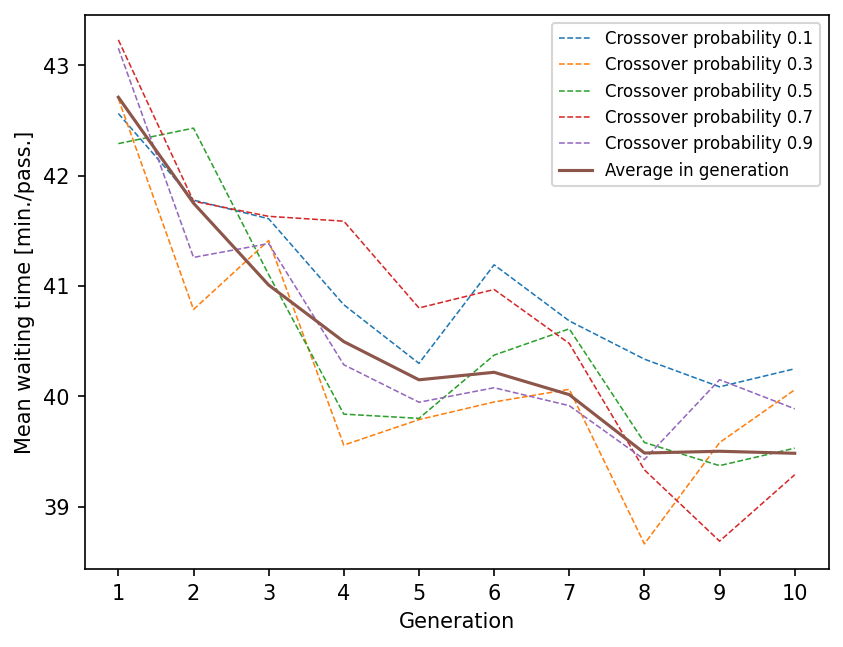

In [3]:
plt.figure(dpi=150)
xticks = range(1, 11, 1)
idx = 0
for pc in range(1, 11, 2):
    # plt.plot(xticks, xs[idx],lw=0.75, label=f'Імовірність кросоверу {round(0.1 * pc, 1)}', linestyle='--')
    plt.plot(xticks, xs[idx],lw=0.75, label=f'Crossover probability {round(0.1 * pc, 1)}', linestyle='--')
    idx += 1
# plt.plot(xticks, xs.mean(axis=0), lw=1.5, label=f'Середнє значення у поколіннях')
plt.plot(xticks, xs.mean(axis=0), lw=1.5, label=f'Average in generation')

plt.ylabel('Середній час очікування [хв./пас.]')
plt.xlabel('Покоління')

plt.ylabel('Mean waiting time [min./pass.]')
plt.xlabel('Generation')

plt.xticks(xticks)
plt.legend(fontsize=8)
plt.show()

intercept=39.45563675981827
coefs=[-0.5914229]
R2=0.1711134323961634
t_alfa(0.05,8)=2.3060041350333704
coef1	True	-1.0826873437693982	-0.100158454653409
intercept=42.71482283565705
coefs=[0.16841082]
R2=0.006868250077486371
t_alfa(0.05,8)=2.3060041350333704
coef1	False	-0.5958860397307875	0.9327076834251558
intercept=40.77244003650478
coefs=[-0.52568942]
R2=0.3693554984002695
t_alfa(0.05,8)=2.3060041350333704
coef1	True	-0.7849347530681341	-0.2664440790682942


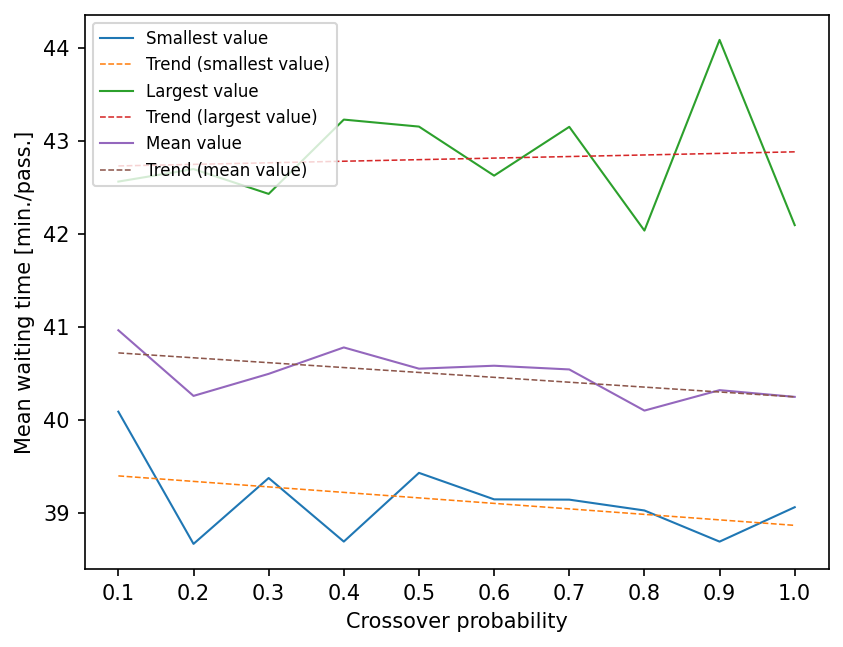

In [4]:
xticks = [0.1 * x for x in range(1, 11, 1)]
linear = lambda a, b, x: a + b * x
alpha = 0.05

X = np.array([[x for x in xticks]]).T
rm_min = tools.make_regression(X, xs.min(axis=1), alpha=alpha, verbose=True)[0]
rm_max = tools.make_regression(X, xs.max(axis=1), alpha=alpha, verbose=True)[0]
rm_mean = tools.make_regression(X, xs.mean(axis=1), alpha=alpha, verbose=True)[0]

plt.figure(dpi=150)

# plt.plot(xticks, xs.min(axis=1),lw=1, label='Мінімальне значення', linestyle='-')
# plt.plot(xticks, linear(rm_min.intercept_, rm_min.coef_, xticks),
#          lw=0.75, label='Тренд (мінімальне значення)', linestyle='--')

# plt.plot(xticks, xs.max(axis=1),lw=1, label='Максимальне значення', linestyle='-')
# plt.plot(xticks, linear(rm_max.intercept_, rm_max.coef_, xticks),
#          lw=0.75, label='Тренд (максимальне значення)', linestyle='--')

# plt.plot(xticks, xs.mean(axis=1),lw=1, label='Середнє значення', linestyle='-')
# plt.plot(xticks, linear(rm_mean.intercept_, rm_mean.coef_, xticks),
#          lw=0.75, label='Тренд (середнє значення)', linestyle='--')

# plt.ylabel('Середній час очікування [хв./.пас.]')
# plt.xlabel('Імовірність кросоверу')

plt.plot(xticks, xs.min(axis=1),lw=1, label='Smallest value', linestyle='-')
plt.plot(xticks, linear(rm_min.intercept_, rm_min.coef_, xticks),
         lw=0.75, label='Trend (smallest value)', linestyle='--')

plt.plot(xticks, xs.max(axis=1),lw=1, label='Largest value', linestyle='-')
plt.plot(xticks, linear(rm_max.intercept_, rm_max.coef_, xticks),
         lw=0.75, label='Trend (largest value)', linestyle='--')

plt.plot(xticks, xs.mean(axis=1),lw=1, label='Mean value', linestyle='-')
plt.plot(xticks, linear(rm_mean.intercept_, rm_mean.coef_, xticks),
         lw=0.75, label='Trend (mean value)', linestyle='--')

plt.ylabel('Mean waiting time [min./pass.]')
plt.xlabel('Crossover probability')

plt.xticks(xticks)
plt.legend(fontsize=8, loc='upper left')
plt.show()